In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import quandl

### AAII Investor Sentiment
* Weekly 

In [2]:
aaii = quandl.get("AAII/AAII_SENTIMENT", authtoken="***************")

In [3]:
aaii.shape

(1720, 12)

In [4]:
aaii.head(3)

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,,,,,,,
1987-06-26,NaN,NaN,NaN,NaN,NaN,NaN,0.386014,0.489178,0.28285,NaN,NaN,NaN
1987-07-17,NaN,NaN,NaN,NaN,NaN,NaN,0.386014,0.489178,0.28285,314.59,307.63,314.59
1987-07-24,0.36,0.5,0.14,1.0,NaN,0.22,0.386014,0.489178,0.28285,311.39,307.81,309.27


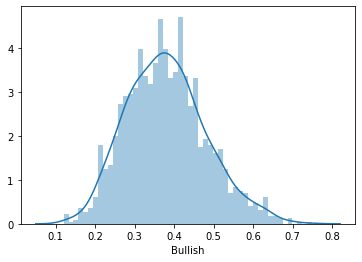

In [5]:
sns.distplot(aaii['Bullish'], bins=50)
plt.show()

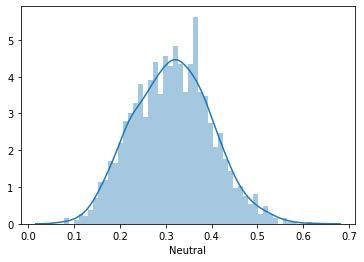

In [6]:
sns.distplot(aaii['Neutral'], bins=50)
plt.show()

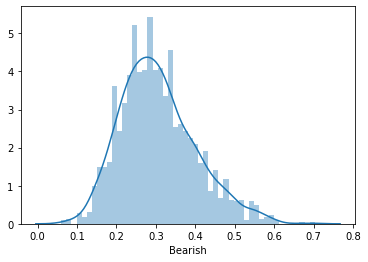

In [7]:
sns.distplot(aaii['Bearish'], bins=50)
plt.show()

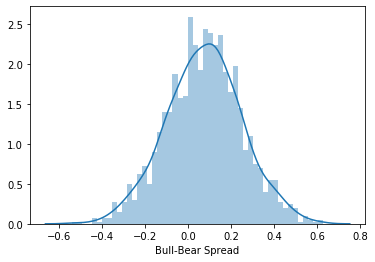

In [8]:
sns.distplot(aaii['Bull-Bear Spread'], bins=50)
plt.show()

In [9]:
aaii = aaii[['Bullish','Neutral','Bearish','Bull-Bear Spread']].pct_change().dropna()

aaii = aaii[['Bullish','Neutral','Bearish','Bull-Bear Spread']]

aaii = aaii.resample('d').ffill().dropna()

In [10]:
aaii.head(3)

,Bullish,Neutral,Bearish,Bull-Bear Spread
Date,,,,
1987-07-31,-0.277778,-0.04,0.857143,-1.0
1987-08-01,-0.277778,-0.04,0.857143,-1.0
1987-08-02,-0.277778,-0.04,0.857143,-1.0


In [27]:
aaii.tail(3)

,Bullish,Neutral,Bearish,Bull-Bear Spread
Date,,,,
2020-06-23,-0.289106,0.006327,0.255832,5.205666
2020-06-24,-0.289106,0.006327,0.255832,5.205666
2020-06-25,-0.009406,-0.031920,0.023397,0.057529


In [102]:
#extrapolate last datapoint to today
aaii_days = ((aaii.tail(1).index  - pd.datetime.today()).days[0]*-1) - 1
aaii = aaii.append([aaii.tail(1)]*aaii_days)

aaii_index = pd.date_range('1987/07/31', pd.datetime.today())
aaii = aaii.set_index(aaii_index)

C:\Users\Ronnie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Big Mac Index
* Bi-annual

In [105]:
bigmac = quandl.get("ECONOMIST/BIGMAC_USA", authtoken="***************")

In [106]:
bigmac.shape

(32, 10)

In [107]:
bigmac.head(3)

,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation
Date,,,,,,,,,,
2000-04-30,2.51,1.0,2.51,1.0,0.0,NaN,NaN,NaN,NaN,NaN
2001-04-30,2.54,1.0,2.54,1.0,0.0,NaN,NaN,NaN,NaN,NaN
2002-04-30,2.49,1.0,2.49,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [108]:
bigmac.tail(3)

,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation
Date,,,,,,,,,,
2019-01-31,5.58,1.0,5.58,1.0,0.0,0.0,-2.6,13.9,27.2,4.0
2019-07-31,5.74,1.0,5.74,1.0,0.0,0.0,3.6,18.3,33.3,13.4
2020-01-31,5.67,1.0,5.67,1.0,0.0,0.0,2.8,9.1,31.8,9.2


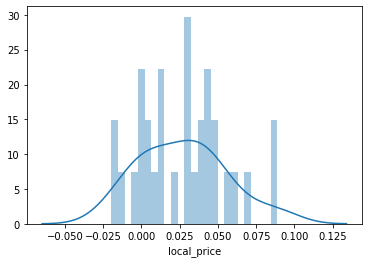

In [109]:
sns.distplot(bigmac['local_price'].pct_change(), bins=25)

In [110]:
bigmac = bigmac['local_price'].pct_change().dropna()
bigmac = pd.DataFrame(bigmac.resample('d').ffill().dropna())

In [111]:
bigmac.head(3)

,local_price
Date,
2001-04-30,0.011952
2001-05-01,0.011952
2001-05-02,0.011952


In [112]:
bigmac.tail(3)

,local_price
Date,
2020-01-29,0.028674
2020-01-30,0.028674
2020-01-31,-0.012195


In [113]:
#extrapolate last datapoint to today
bigmac_days = ((bigmac.tail(1).index  - pd.datetime.today()).days[0]*-1) - 1
bigmac = bigmac.append([bigmac.tail(1)]*bigmac_days)

bigmac_index = pd.date_range('2001-04-30', pd.datetime.today())
bigmac = bigmac.set_index(bigmac_index)

C:\Users\Ronnie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
C:\Users\Ronnie\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


### Eureka Multi Factor Risk Premia Index
* Monthly

In [125]:
eureka = quandl.get("EUREKA/MEI27", authtoken="***************")

In [126]:
eureka.shape

(119, 1)

In [127]:
eureka.head(3)

,Returns
Date,
2010-08-31,0.729503
2010-09-30,1.894452
2010-10-31,2.550354


In [128]:
eureka.tail(3)

,Returns
Date,
2020-04-30,-0.278543
2020-05-31,-0.180853
2020-06-30,-1.265943


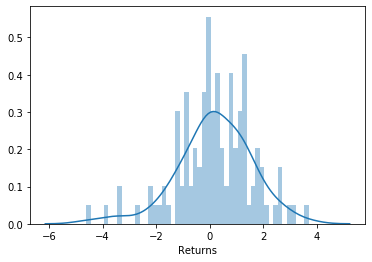

In [129]:
sns.distplot(eureka['Returns'], bins=50)
plt.show()

In [130]:
eureka = eureka['Returns'].pct_change().dropna()
eureka = pd.DataFrame(eureka.resample('d').ffill().dropna())

In [131]:
eureka.head(3)

,Returns
Date,
2010-09-30,1.596909
2010-10-01,1.596909
2010-10-02,1.596909


In [132]:
eureka.tail(3)

,Returns
Date,
2020-06-28,-0.350717
2020-06-29,-0.350717
2020-06-30,5.999842


In [133]:
#extrapolate last datapoint to today
eureka_days = ((eureka.tail(1).index  - pd.datetime.today()).days[0]*-1) - 1
eureka = eureka.append([eureka.tail(1)]*eureka_days)

eureka_index = pd.date_range('2010-09-30', pd.datetime.today())
eureka = eureka.set_index(eureka_index)

C:\Users\Ronnie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ronnie\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


### US Misery Index

In [161]:
misery = quandl.get("USMISERY/INDEX", authtoken="***************")

In [162]:
misery.shape

(867, 3)

In [163]:
misery.head(3)

,Unemployment Rate,Inflation Rate,Misery Index
Date,,,
1948-01-31,3.4,10.23,13.63
1948-02-29,3.8,9.30,13.10
1948-03-31,4.0,6.85,10.85


In [164]:
misery.tail(3)

,Unemployment Rate,Inflation Rate,Misery Index
Date,,,
2020-03-31,4.4,1.54,5.94
2020-04-30,14.7,0.33,15.03
2020-05-31,13.3,0.12,13.42


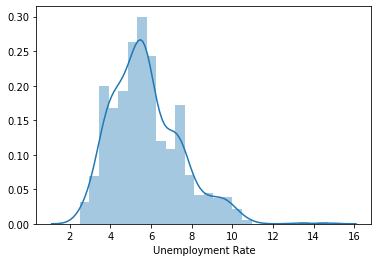

In [165]:
sns.distplot(misery['Unemployment Rate'])
plt.show()

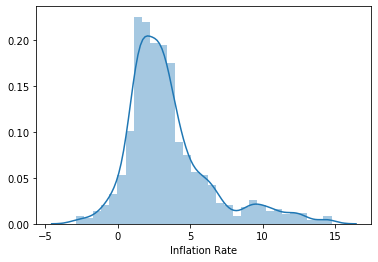

In [166]:
sns.distplot(misery['Inflation Rate'])
plt.show()

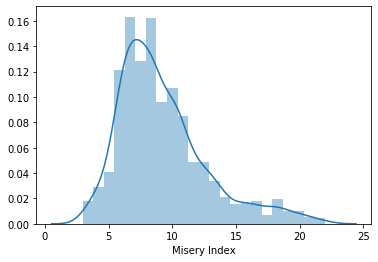

In [167]:
sns.distplot(misery['Misery Index'])
plt.show()

In [168]:
misery = misery[['Unemployment Rate','Inflation Rate','Misery Index']].pct_change().dropna()
misery = misery[['Unemployment Rate','Inflation Rate','Misery Index']]
misery = misery.resample('d').ffill().dropna()

In [169]:
misery.head(3)

,Unemployment Rate,Inflation Rate,Misery Index
Date,,,
1948-02-29,0.117647,-0.090909,-0.038885
1948-03-01,0.117647,-0.090909,-0.038885
1948-03-02,0.117647,-0.090909,-0.038885


In [170]:
misery.tail(3)

,Unemployment Rate,Inflation Rate,Misery Index
Date,,,
2020-05-29,2.340909,-0.785714,1.530303
2020-05-30,2.340909,-0.785714,1.530303
2020-05-31,-0.095238,-0.636364,-0.107119


In [171]:
#extrapolate last datapoint to today
misery_days = ((misery.tail(1).index  - pd.datetime.today()).days[0]*-1) - 1
misery = misery.append([misery.tail(1)]*misery_days)

misery_index = pd.date_range('1948-02-29', pd.datetime.today())
misery = misery.set_index(misery_index)

C:\Users\Ronnie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
C:\Users\Ronnie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


### Reddit WorldNews Sentiment
* textblob sentiment
* vader sentiment

In [55]:
reddit = pd.read_csv("Reddit Sentiment/sentiments.csv")

In [56]:
reddit.head(3)

,Date,textblob_sentiment,vader_sentiment
0,2008-06-08,-1,-1
1,2008-06-09,0,-1
2,2008-06-10,-1,-1


In [57]:
reddit.tail(3)

,Date,textblob_sentiment,vader_sentiment
2940,2016-06-29,1,1
2941,2016-06-30,1,-1
2942,2016-07-01,1,-1


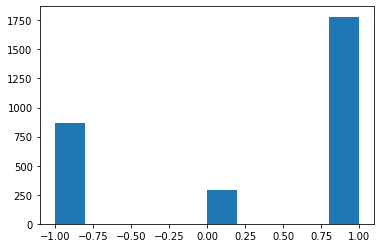

In [58]:
plt.hist(reddit['textblob_sentiment'])
plt.show()

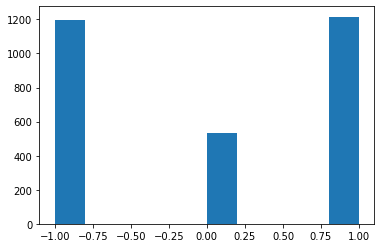

In [59]:
plt.hist(reddit['vader_sentiment'])
plt.show()

In [60]:
reddit.index = pd.to_datetime(reddit['Date'])
reddit.drop('Date', axis=1, inplace=True)

### Merging Alternative Data
* reddit (2008-06-09 - 2016-07-01)
* misery (1948-01-31 - 2020-04-30)
* eureka (2010-08-31 - 2020-04-30)
* bigmac (2000-04-30 - 2019-07-31)
* aaii   (1987-06-26 - 2020-06-18) 

In [174]:
alternative_data = eureka.join(misery).join(bigmac).join(aaii)
alternative_data.replace([np.inf, -np.inf], np.nan, inplace=True)
alternative_data.dropna(inplace=True)

In [175]:
alternative_data.head(3)

,Returns,Unemployment Rate,Inflation Rate,Misery Index,local_price,Bullish,Neutral,Bearish,Bull-Bear Spread
2010-09-30,1.596909,0.0,-0.008696,-0.00093,0.042831,-0.054258,-0.127236,0.244488,-0.442003
2010-10-01,1.596909,0.0,-0.008696,-0.00093,0.042831,-0.054258,-0.127236,0.244488,-0.442003
2010-10-02,1.596909,0.0,-0.008696,-0.00093,0.042831,-0.054258,-0.127236,0.244488,-0.442003


In [176]:
alternative_data.tail(3)

,Returns,Unemployment Rate,Inflation Rate,Misery Index,local_price,Bullish,Neutral,Bearish,Bull-Bear Spread
2020-06-29,-0.350717,-0.095238,-0.636364,-0.107119,-0.012195,-0.009406,-0.03192,0.023397,0.057529
2020-06-30,5.999842,-0.095238,-0.636364,-0.107119,-0.012195,-0.009406,-0.03192,0.023397,0.057529
2020-07-01,5.999842,-0.095238,-0.636364,-0.107119,-0.012195,-0.009406,-0.03192,0.023397,0.057529


In [177]:
alternative_data.sample(10)

,Returns,Unemployment Rate,Inflation Rate,Misery Index,local_price,Bullish,Neutral,Bearish,Bull-Bear Spread
2013-03-22,-1.031326,-0.025316,0.245283,0.020021,0.009219,-0.142583,0.229392,0.040690,-0.580986
2013-10-08,-1.798561,-0.013699,-0.223684,-0.049887,0.043337,0.049464,-0.037161,-0.017790,0.427768
2020-02-04,-1.955020,0.028571,0.087336,0.051813,-0.012195,-0.298751,0.051830,0.488035,-1.234148
2019-07-04,-1.904348,0.000000,-0.105000,-0.037500,0.012704,0.120521,-0.100745,0.009300,-1.325331
2016-03-25,-0.081572,0.000000,-0.255474,-0.055821,0.029228,0.127579,-0.015659,-0.117124,2.248322
2012-08-03,-3.097266,0.012195,-0.150602,-0.015213,0.031040,0.082974,0.204246,-0.190248,-0.701811
2018-08-23,-0.697906,-0.025000,0.027875,-0.002911,0.043561,0.063348,-0.008025,-0.069210,0.606836
2013-07-01,-0.661736,0.000000,0.286765,0.043527,0.009219,-0.191653,0.060529,0.173741,-1.653210
2019-08-17,-1.019022,0.000000,-0.105000,-0.037500,0.028674,0.070183,0.060553,-0.069415,-0.183329
2016-08-06,-2.109843,0.000000,-0.168317,-0.028765,0.022312,-0.046810,0.076815,-0.057591,0.061002


In [184]:
alternative_data

,index,Returns,Unemployment Rate,Inflation Rate,Misery Index,local_price,Bullish,Neutral,Bearish,Bull-Bear Spread
0,2010-09-30,1.596909,0.000000,-0.008696,-0.000930,0.042831,-0.054258,-0.127236,0.244488,-0.442003
1,2010-10-01,1.596909,0.000000,-0.008696,-0.000930,0.042831,-0.054258,-0.127236,0.244488,-0.442003
2,2010-10-02,1.596909,0.000000,-0.008696,-0.000930,0.042831,-0.054258,-0.127236,0.244488,-0.442003
3,2010-10-03,1.596909,0.000000,-0.008696,-0.000930,0.042831,-0.054258,-0.127236,0.244488,-0.442003
4,2010-10-04,1.596909,0.000000,-0.008696,-0.000930,0.042831,-0.054258,-0.127236,0.244488,-0.442003
...,...,...,...,...,...,...,...,...,...,...
3523,2020-06-27,-0.350717,-0.095238,-0.636364,-0.107119,-0.012195,-0.009406,-0.031920,0.023397,0.057529
3524,2020-06-28,-0.350717,-0.095238,-0.636364,-0.107119,-0.012195,-0.009406,-0.031920,0.023397,0.057529
3525,2020-06-29,-0.350717,-0.095238,-0.636364,-0.107119,-0.012195,-0.009406,-0.031920,0.023397,0.057529
3526,2020-06-30,5.999842,-0.095238,-0.636364,-0.107119,-0.012195,-0.009406,-0.031920,0.023397,0.057529


In [183]:
alternative_data.to_csv("data/cleaned_alternative_data.csv")